# Compute cluster groups 

In [1]:
WRK_DIR=/data/hodges_lab/Tim/ClusterTesting/
mkdir -p ${WRK_DIR}

In [2]:
# RefSeq TSS/Exon file
TSSExon_FILE=/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/referenceFiles/ncbiRefSeqCurated_NM.promotersUp2000Down1000AndExons.txt 

In [3]:
# B cell - filtered for RefSeq TSS/Exon file 
BCL_FILE=/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/Bcell.minsize50.filtforrefseqTSSexons.txt

wc -l ${BCL_FILE}

34070 /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/Bcell.minsize50.filtforrefseqTSSexons.txt


In [4]:
# B cell - HMR file as downloaded
BCL_BASE_FILE=/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/startingBEDs/Bcell.hmr.bed
wc -l ${BCL_BASE_FILE}

54998 /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/startingBEDs/Bcell.hmr.bed


## Unclustered - current method 

In [5]:
awk 'BEGIN{OFS=FS="\t"}{if (($3-$2)>49) print $1,$2,$3}' ${BCL_BASE_FILE} | bedtools merge -c 2 -o count -d 6000 -i - | awk 'BEGIN{FS=OFS="\t"}{if ($4<2) print}' - | awk 'BEGIN{OFS=FS="\t"}{print $1,$2,$3}' - | bedtools intersect -v -a - -b ${TSSExon_FILE} > ${WRK_DIR}Bcell_unclustered_hpl.current.txt

echo "Found unclustered HMRs."

Found unclustered HMRs.


## Unclustered - RefSeq filter first (More inclusive)

In [7]:
bedtools merge -c 2 -o count -d 6000 -i ${BCL_FILE} | awk 'BEGIN{FS=OFS="\t"}{if ($4<2) print}' - | awk 'BEGIN{OFS=FS="\t"}{print $1,$2,$3}' - > ${WRK_DIR}Bcell_unclustered_hpl.RefSeqFilterFirst.txt

echo "Done."

Done.


### Unclustered - RefSeq - cell specific 

In [29]:
bedtools intersect -u -a ${WRK_DIR}Bcell_unclustered_hpl.RefSeqFilterFirst.txt -b /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_all_cellspecific_hpl.txt > ${WRK_DIR}Bcell_unclustered_hpl.RefSeqFilterFirst.cellspecific.txt

## Clusters of two - internal clusters 

In [5]:
head ${TSSExon_FILE}

chr1	67090	70090	NM_001005484.1
chr1	69090	70008	NM_001005484.1
chr1	365658	368658	NM_001005221.2
chr1	367658	368597	NM_001005221.2
chr1	621034	624034	NM_001005277.1
chr1	621095	622034	NM_001005277.1
chr1	859110	862110	NM_152486.3
chr1	861110	861180	NM_152486.3
chr1	861301	861393	NM_152486.3
chr1	865534	865716	NM_152486.3


In [10]:
head /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/referenceFiles/hg19.chrom.sizes.twoCol.sorted

chr1	249250621
chr10	135534747
chr11	135006516
chr12	133851895
chr13	115169878
chr14	107349540
chr15	102531392
chr16	90354753
chr17	81195210
chr18	78077248


In [5]:
awk 'BEGIN{OFS=FS="\t"}{if ($1 !~ /\_/)print $1,$2,$3}' ${TSSExon_FILE} | bedtools sort -i - | bedtools complement -i - -g /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/referenceFiles/hg19.chrom.sizes.twoCol.sorted > ${WRK_DIR}Bcell_whitelist.txt
echo "Made whitelist."


Made whitelist.


In [15]:
head ${WRK_DIR}Bcell_whitelist.txt
head ${WRK_DIR}Bcell_whitelistRegions_contain2ormoreHMRs_hpl.txt

chr1	0	67090
chr1	70090	365658
chr1	368658	621034
chr1	624034	859110
chr1	862110	865534
chr1	865716	866418
chr1	866469	871151
chr1	871276	874419
chr1	874509	874654
chr1	874840	876523
chr1	368658	621034	4
chr1	624034	859110	13
chr1	866469	871151	2
chr1	919473	934343	2
chr1	991496	1006346	6
chr1	1011686	1017202	2
chr1	1053469	1107259	9
chr1	1184102	1189291	2
chr1	1512243	1533391	2
chr1	1537515	1548794	2


In [18]:
head -n 15 ${WRK_DIR}Bcell_whitelistRegions_cluster_contain2ormoreHMRs_individualHMRs_temp_hpl.txt

chr1	521533	521660	chr1	368658	621034	4
chr1	564470	566009	chr1	368658	621034	4
chr1	566458	566879	chr1	368658	621034	4
chr1	567166	570301	chr1	368658	621034	4
chr1	713671	715041	chr1	624034	859110	13
chr1	724219	724516	chr1	624034	859110	13
chr1	762003	763205	chr1	624034	859110	13
chr1	794016	794456	chr1	624034	859110	13
chr1	801089	801505	chr1	624034	859110	13
chr1	804991	805500	chr1	624034	859110	13
chr1	832618	833196	chr1	624034	859110	13
chr1	833785	834596	chr1	624034	859110	13
chr1	839724	841039	chr1	624034	859110	13
chr1	842095	842689	chr1	624034	859110	13
chr1	845310	845847	chr1	624034	859110	13


In [17]:
head ${WRK_DIR}Bcell_internalClusters_contain2HMRs_hpl.txt

chr1	801089	805500	2
chr1	867226	870886	2
chr1	931262	933045	2
chr1	1013125	1016103	2
chr1	1185531	1186514	2
chr1	1538029	1542805	2
chr1	1609040	1610648	2
chr1	1792416	1796593	2
chr1	1941843	1946688	2
chr1	1976113	1978261	2


In [19]:
wc -l ${WRK_DIR}Bcell_internalClusters_contain2HMRs_hpl_BED.txt
wc -l ${WRK_DIR}Bcell_internalClusters_contain2HMRs_individualHMRs_hpl.txt

3602 /data/hodges_lab/Tim/ClusterTesting/Bcell_internalClusters_contain2HMRs_hpl_BED.txt
7204 /data/hodges_lab/Tim/ClusterTesting/Bcell_internalClusters_contain2HMRs_individualHMRs_hpl.txt


In [7]:
echo "Start."

awk 'BEGIN{OFS=FS="\t"}{if ($1 !~ /\_/)print $1,$2,$3}' ${TSSExon_FILE} | bedtools sort -i - | bedtools complement -i - -g /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/referenceFiles/hg19.chrom.sizes.twoCol.sorted > ${WRK_DIR}Bcell_whitelist.txt
echo "Made whitelist."


# (a) Find whitelist regions with 2+ HMRs
bedtools intersect -c -F 1.0 -a ${WRK_DIR}Bcell_whitelist.txt -b ${BCL_FILE} | awk 'BEGIN{OFS=FS="\t"}{if ($4>1) print}' - > ${WRK_DIR}Bcell_whitelistRegions_contain2ormoreHMRs_hpl.txt
echo "Found whitelist regions that contain 2+ HMRs."

# (b)Find what HMRs are in these to create a double BED file in a parsable list for custom merging: [1-3]: BED coordinates of Whitelist region [4]: #HMR in Whitelist region, [5-7]: BED coordinates of HMRs in Whitelist region
# Diagnostic: bedtools intersect -loj -F 1.0 -a Bcell_whitelistRegions_contain3ormoreHMRs.txt -b Bcell.HMR.min50.txt | awk 'BEGIN{OFS=FS="\t"}{print}' - | bedtools sort -i - | head
# awk 'BEGIN{OFS=FS="\t"}{print $5,$6,$7,$1,$2,$3,$4}' temp.txt | head

bedtools intersect -loj -F 1.0 -a ${WRK_DIR}Bcell_whitelistRegions_contain2ormoreHMRs_hpl.txt -b ${BCL_FILE} | awk 'BEGIN{OFS=FS="\t"}{print $5,$6,$7,$1,$2,$3,$4}' - | bedtools sort -i - > ${WRK_DIR}Bcell_whitelistRegions_cluster_contain2ormoreHMRs_individualHMRs_temp_hpl.txt
echo "Created double BED for whitelist regions that contain 2+ HMRs."

# (c) Custom merge within these regions
awk -v whitelistStart=1 -v hmrsCount=1 -v clusterChr=1 -v clusterStart=1 -v clusterEnd=2 'BEGIN{OFS=FS="\t";dist=6000;whitelistStart=1;hmrsCount=1;clusterChr=1;clusterStart=1;clusterEnd=2;} {
# Check if we are in the same WhitelistBoundary
if ($5!=whitelistStart) {
print clusterChr,clusterStart,clusterEnd,hmrsCount;
whitelistStart=$5;
hmrsCount=1;
clusterChr=$1;
clusterStart=$2;
clusterEnd=$3;
} else {
# case if (1) we are staying within a Whitelist boundary, but (2) the previous HMR was >6000bp away
if (($2-clusterEnd)>6000) {
print clusterChr,clusterStart,clusterEnd,hmrsCount;
clusterStart=$2;
clusterEnd=$3;
hmrsCount=1;
} else {
clusterEnd=$3;
hmrsCount+=1;
}
}
}' ${WRK_DIR}Bcell_whitelistRegions_cluster_contain2ormoreHMRs_individualHMRs_temp_hpl.txt | awk 'BEGIN{OFS=FS="\t"}{if ($4==2) print $0}' - > ${WRK_DIR}Bcell_internalClusters_contain2HMRs_hpl.txt

echo "Found internalClusters containing exactly 2 HMRs."

#########################
#########################
#########################
# Remove unplaced contigs, causes issues downline 
awk 'BEGIN{OFS=FS="\t"}{if ($1 !~ /\_/)print $1,$2,$3}' ${WRK_DIR}Bcell_internalClusters_contain2HMRs_hpl.txt > ${WRK_DIR}Bcell_internalClusters_contain2HMRs_hpl_BED.txt
echo -e "\n"


##### ((5)) internalClusters_individualHMRs 
#####
bedtools intersect -u -a ${BCL_FILE} -b ${WRK_DIR}Bcell_internalClusters_contain2HMRs_hpl_BED.txt > ${WRK_DIR}Bcell_internalClusters_contain2HMRs_individualHMRs_hpl.txt
echo "Found the HMRs composing internalClusters containing exactly 2 HMRs."




Start.
Made whitelist.
Found whitelist regions that contain 2+ HMRs.
Created double BED for whitelist regions that contain 2+ HMRs.
Found internalClusters containing exactly 2 HMRs.


Found the HMRs composing internalClusters containing 3+ HMRs.


## Clusters of three - internal clusters

In [11]:
echo "Starting."

awk 'BEGIN{OFS=FS="\t"}{if ($1 !~ /\_/)print $1,$2,$3}' ${TSSExon_FILE} | bedtools sort -i - | bedtools complement -i - -g /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/referenceFiles/hg19.chrom.sizes.twoCol.sorted > ${WRK_DIR}Bcell_whitelist.txt
echo "Made whitelist."


# (a) Find whitelist regions with 3+ HMRs
bedtools intersect -c -F 1.0 -a ${WRK_DIR}Bcell_whitelist.txt -b ${BCL_FILE} | awk 'BEGIN{OFS=FS="\t"}{if ($4>2) print}' - > ${WRK_DIR}Bcell_whitelistRegions_contain3ormoreHMRs_hpl.txt
echo "Found whitelist regions that contain 3+ HMRs."


bedtools intersect -loj -F 1.0 -a ${WRK_DIR}Bcell_whitelistRegions_contain3ormoreHMRs_hpl.txt -b ${BCL_FILE} | awk 'BEGIN{OFS=FS="\t"}{print $5,$6,$7,$1,$2,$3,$4}' - | bedtools sort -i - > ${WRK_DIR}Bcell_whitelistRegions_cluster_individualHMRs_temp_hpl.txt

echo "Created double BED for whitelist regions that contain 3+ HMRs."

# (c) Custom merge within these regions
awk -v whitelistStart=1 -v hmrsCount=1 -v clusterChr=1 -v clusterStart=1 -v clusterEnd=2 'BEGIN{OFS=FS="\t";dist=6000;whitelistStart=1;hmrsCount=1;clusterChr=1;clusterStart=1;clusterEnd=2;} {
# Check if we are in the same WhitelistBoundary
if ($5!=whitelistStart) {
print clusterChr,clusterStart,clusterEnd,hmrsCount;
whitelistStart=$5;
hmrsCount=1;
clusterChr=$1;
clusterStart=$2;
clusterEnd=$3;
} else {
# case if (1) we are staying within a Whitelist boundary, but (2) the previous HMR was >6000bp away
if (($2-clusterEnd)>6000) {
print clusterChr,clusterStart,clusterEnd,hmrsCount;
clusterStart=$2;
clusterEnd=$3;
hmrsCount=1;
} else {
clusterEnd=$3;
hmrsCount+=1;
}
}
}' ${WRK_DIR}Bcell_whitelistRegions_cluster_individualHMRs_temp_hpl.txt | awk 'BEGIN{OFS=FS="\t"}{if ($4>2) print $0}' - > ${WRK_DIR}Bcell_internalClusters_hpl.txt
echo "Found internalClusters containing 3+ HMRs."

#########################
#########################
#########################
# Remove unplaced contigs, causes issues downline 
awk 'BEGIN{OFS=FS="\t"}{if ($1 !~ /\_/)print $1,$2,$3}' ${WRK_DIR}Bcell_internalClusters_hpl.txt > ${WRK_DIR}Bcell_internalClusters_hpl_BED.txt
echo -e "\n"


##### ((5)) internalClusters_individualHMRs 
#####
bedtools intersect -u -a ${BCL_FILE} -b ${WRK_DIR}Bcell_internalClusters_hpl_BED.txt > ${WRK_DIR}Bcell_internalClusters_individualHMRs_hpl.txt
echo "Found the HMRs composing internalClusters containing 3+ HMRs."




Starting.
Made whitelist.
Found whitelist regions that contain 3+ HMRs.
Created double BED for whitelist regions that contain 3+ HMRs.
Found internalClusters containing 3+ HMRs.


Found the HMRs composing internalClusters containing 3+ HMRs.


In [22]:
 bedtools merge -c 2 -o count -d 6000 -i ${BCL_FILE} | awk 'BEGIN{FS=OFS="\t"}{if ($4==2) print}' - | wc -l

3734


In [23]:
wc -l ${WRK_DIR}Bcell_internalClusters_contain2HMRs_hpl.txt

3602 /data/hodges_lab/Tim/ClusterTesting/Bcell_internalClusters_contain2HMRs_hpl.txt


In [24]:
wc -l ${WRK_DIR}Bcell_internalClusters_contain2HMRs_individualHMRs_hpl.txt
wc -l ${WRK_DIR}Bcell_internalClusters_individualHMRs_hpl.txt


7204 /data/hodges_lab/Tim/ClusterTesting/Bcell_internalClusters_contain2HMRs_individualHMRs_hpl.txt
5974 /data/hodges_lab/Tim/ClusterTesting/Bcell_internalClusters_individualHMRs_hpl.txt


# Get 2-HMR clusters that contain a cell specific 

In [ ]:
${WRK_DIR}Bcell_internalClusters_contain2HMRs_hpl_BED.txt 

In [25]:
bedtools intersect -u -a ${WRK_DIR}Bcell_internalClusters_contain2HMRs_hpl_BED.txt -b /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_all_cellspecific_hpl.txt > ${WRK_DIR}Bcell_internalClusters_contain2HMRs_hpl.containsCS.txt

In [26]:
echo "Done."

Done.


# nnRNA

# Get 2NN

In [1]:
HOME_DIR=/data/hodges_lab/Tim/nnRNA_TPM_EHGM/
mkdir -p ${HOME_DIR}
REF_DIR=${HOME_DIR}reference_files/

# Directory 
mkdir -p ${HOME_DIR}intermediate_files
cd ${HOME_DIR}intermediate_files

INTER_DIR=${HOME_DIR}intermediate_files/
REF_DIR=${HOME_DIR}reference_files/
OUT_DIR=${HOME_DIR}output_files/

echo "Done."

Done.


In [28]:
# Bcell 
bedtools sort -i ${REF_DIR}GM_ENSG_TPM_avg12_noVersion_hasHGNC_minTPM0.txt | awk 'BEGIN{OFS=FS="\t"}{print }' - > ${REF_DIR}GM_ENSG_TPM_avg12_noVersion_hasHGNC_minTPM0.sorted.txt

echo "Done."

Done.


In [2]:
# Initalize HMR files 
CLUSTERED_CS_FILE=/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_internalClusters_individualHMRs_cellspecific_hpl.txt
UNCLUSTERED_CS_FILE=/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_unclustered_cellspecific_hpl.txt
UNCLUSTERED_CS_ALL_FILE=/data/hodges_lab/Tim/ClusterTesting/Bcell_unclustered_hpl.RefSeqFilterFirst.cellspecific.txt
echo "Done."

Done.


In [3]:
wc -l $CLUSTERED_CS_FILE
wc -l $UNCLUSTERED_CS_FILE
wc -l $UNCLUSTERED_CS_ALL_FILE

756 /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_internalClusters_individualHMRs_cellspecific_hpl.txt
1844 /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_unclustered_cellspecific_hpl.txt
2270 /data/hodges_lab/Tim/ClusterTesting/Bcell_unclustered_hpl.RefSeqFilterFirst.cellspecific.txt


In [30]:
# Initalize HMR files 
CLUSTERED_CS_FILE=/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_internalClusters_individualHMRs_cellspecific_hpl.txt
UNCLUSTERED_CS_FILE=/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_unclustered_cellspecific_hpl.txt
UNCLUSTERED_CS_ALL_FILE=/data/hodges_lab/Tim/ClusterTesting/Bcell_unclustered_hpl.RefSeqFilterFirst.cellspecific.txt

awk 'BEGIN{OFS=FS="\t"}{print $1,$2,$3,"Bcell_ClusteredCS"}' ${CLUSTERED_CS_FILE} | bedtools sort -i - > ${INTER_DIR}Bcell.clustered_cs.tmp_sorted.txt
awk 'BEGIN{OFS=FS="\t"}{print $1,$2,$3,"Bcell_UnclusteredCS"}' ${UNCLUSTERED_CS_FILE} | bedtools sort -i - > ${INTER_DIR}Bcell.unclustered_cs.tmp_sorted.txt
awk 'BEGIN{OFS=FS="\t"}{print $1,$2,$3,"Bcell_UnclusteredLooseCS"}' ${UNCLUSTERED_CS_ALL_FILE} | bedtools sort -i - > ${INTER_DIR}Bcell.unclustered_loose_cs.tmp_sorted.txt

echo "Done."

Done.


In [ ]:
# Clusters contain cell specific 

In [31]:
## How many clusters are represented by the individual clustered cell specific HMRs
bedtools intersect -u -a /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_internalClusters_hpl.txt -b /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_internalClusters_individualHMRs_cellspecific_hpl.txt > ${INTER_DIR}Bcell_internalClusters_hpl.containsCellSpecificHMR.txt

wc -l ${INTER_DIR}Bcell_internalClusters_hpl.containsCellSpecificHMR.txt

awk 'BEGIN{OFS=FS="\t"}{print $1,$2,$3,"Bcell_ClusteredCS"}' ${INTER_DIR}Bcell_internalClusters_hpl.containsCellSpecificHMR.txt | bedtools sort -i - > ${INTER_DIR}Bcell_internalClusters_hpl.containsCellSpecificHMR.tmp_sorted.txt

484 /data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_internalClusters_hpl.containsCellSpecificHMR.txt


In [ ]:
# Clusters contain cell specific - closest 2NN genes

In [32]:
bedtools closest -d -k 2 -a ${INTER_DIR}Bcell_internalClusters_hpl.containsCellSpecificHMR.tmp_sorted.txt -b ${REF_DIR}GM_ENSG_TPM_avg12_noVersion_hasHGNC_minTPM0.sorted.txt > ${INTER_DIR}Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt

echo "Done."

Done.


In [10]:
# bedtools closest -d -k 2 -a ${INTER_DIR}Bcell.clustered_cs.tmp_sorted.txt -b ${REF_DIR}GM_ENSGGENESYMBOL_minTPM0.sorted.txt > ${INTER_DIR}Bcell_clustered_cellspecific.2NN.GM_ENSGGENESYMBOL_minTPM0.txt

bedtools closest -d -k 2 -a ${INTER_DIR}Bcell.unclustered_cs.tmp_sorted.txt -b ${REF_DIR}GM_ENSG_TPM_avg12_noVersion_hasHGNC_minTPM0.sorted.txt > ${INTER_DIR}Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt

echo "Done."

Done.


In [33]:
# bedtools closest -d -k 2 -a ${INTER_DIR}Bcell.clustered_cs.tmp_sorted.txt -b ${REF_DIR}GM_ENSGGENESYMBOL_minTPM0.sorted.txt > ${INTER_DIR}Bcell_clustered_cellspecific.2NN.GM_ENSGGENESYMBOL_minTPM0.txt

bedtools closest -d -k 2 -a ${INTER_DIR}Bcell.unclustered_loose_cs.tmp_sorted.txt -b ${REF_DIR}GM_ENSG_TPM_avg12_noVersion_hasHGNC_minTPM0.sorted.txt > ${INTER_DIR}Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt

echo "Done."

Done.


In [34]:
wc -l ${INTER_DIR}Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt
wc -l ${INTER_DIR}Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt
wc -l ${INTER_DIR}Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt

970 /data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt
3678 /data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt
4533 /data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt


In [15]:
wc -l Bcell_clusters_containscellspecific.2NN.GM_ENSGGENESYMBOL_minTPM0.ContinuousBEDFormat.txt

968 Bcell_clusters_containscellspecific.2NN.GM_ENSGGENESYMBOL_minTPM0.ContinuousBEDFormat.txt


# TAD Filter

In [35]:
# Intersect 2NN file with TADs

# First, create an HMR-Gene end-to-end BED file:
#"ChrHMRProm","StartHMRProm","EndHMRProm","ChrHMR","StartHMR","EndHMR","ChrProm","StartProm","EndProm","ENSEMBL","TPM","HMRPromDist","HMRGroup"

# Check if HMR is before the TSS, else, TSS before  
awk 'BEGIN{OFS=FS="\t"}{if ($2<$6)
print $1,$2,$7,$1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12;
else print $1,$6,$3,$1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12;
}' ${INTER_DIR}Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt | awk 'BEGIN{OFS=FS="\t"}{if ($2!~/-1/) print}' - > ${INTER_DIR}Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt 

awk 'BEGIN{OFS=FS="\t"}{if ($2<$6)
print $1,$2,$7,$1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12;
else print $1,$6,$3,$1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12;
}' ${INTER_DIR}Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt | awk 'BEGIN{OFS=FS="\t"}{if ($2!~/-1/) print}' - > ${INTER_DIR}Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt


awk 'BEGIN{OFS=FS="\t"}{if ($2<$6)
print $1,$2,$7,$1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12;
else print $1,$6,$3,$1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12;
}' ${INTER_DIR}Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt | awk 'BEGIN{OFS=FS="\t"}{if ($2!~/-1/) print}' - > ${INTER_DIR}Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt

echo "Made continuous BED file."


Made continuous BED file.


In [36]:
bedtools intersect -f 1.0 -a ${INTER_DIR}Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt \
-b ${REF_DIR}GM12878_Lieberman-raw_TADs.txt > ${INTER_DIR}Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt

bedtools intersect -f 1.0 -a ${INTER_DIR}Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt  \
-b ${REF_DIR}GM12878_Lieberman-raw_TADs.txt > ${INTER_DIR}Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt

bedtools intersect -f 1.0 -a ${INTER_DIR}Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt  \
-b ${REF_DIR}GM12878_Lieberman-raw_TADs.txt > ${INTER_DIR}Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt


echo "Done."

Done.


In [39]:
wc -l ${INTER_DIR}Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt
wc -l ${INTER_DIR}Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt
wc -l ${INTER_DIR}Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt
wc -l ${INTER_DIR}Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt

970 /data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt
760 /data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt
2492 /data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt
3227 /data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt


# Remove gene reps 

In [20]:
library(tidyverse)
library(ggplot2)
library(ggpubr)

#Set working directory 
setwd("/data/hodges_lab/Tim/nnRNA_TPM_EHGM/output_files/")

print("Loaded libraries.")

[1] "Loaded libraries."


In [21]:
Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered <- read_tsv("../intermediate_files/Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt", col_names=F) %>% magrittr::set_colnames(c("ChrHMRTSS","StartHMRTSS","EndHMRTSS","ChrHMR","StartHMR","EndHMR","HMRGroup","ChrTSS","StartTSS","EndTSS","TPM","strand","GENE_SYMBOL","ENSEMBL","HMRTSSDist")) 


Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered <- read_tsv("../intermediate_files/Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt", col_names=F) %>% magrittr::set_colnames(c("ChrHMRTSS","StartHMRTSS","EndHMRTSS","ChrHMR","StartHMR","EndHMR","HMRGroup","ChrTSS","StartTSS","EndTSS","TPM","strand","GENE_SYMBOL","ENSEMBL","HMRTSSDist"))

Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered <- read_tsv("../intermediate_files/Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt", col_names=F) %>% magrittr::set_colnames(c("ChrHMRTSS","StartHMRTSS","EndHMRTSS","ChrHMR","StartHMR","EndHMR","HMRGroup","ChrTSS","StartTSS","EndTSS","TPM","strand","GENE_SYMBOL","ENSEMBL","HMRTSSDist"))

Rows: 760 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X4, X7, X8, X13, X14
dbl (9): X2, X3, X5, X6, X9, X10, X11, X12, X15

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2492 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X4, X7, X8, X13, X14
dbl (9): X2, X3, X5, X6, X9, X10, X11, X12, X15

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3227 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X4, X7, X8, X13, X14
dbl (9): X2, X3, X5, X6, X9, X10, X11, X12, X15

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify th

Remove rep call 

In [22]:
Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM <- Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered %>% dplyr::select(ENSEMBL, TPM, HMRTSSDist) %>% dplyr::distinct(ENSEMBL, TPM, .keep_all = TRUE) %>% mutate(HMRGroup = "Bcell_clustered") %>% arrange(ENSEMBL)

Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM <- Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered %>% dplyr::select(ENSEMBL, TPM, HMRTSSDist) %>% dplyr::distinct(ENSEMBL, TPM, .keep_all = TRUE) %>% mutate(HMRGroup = "Bcell_unclustered") %>% arrange(ENSEMBL)

Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM <- Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered %>% dplyr::select(ENSEMBL, TPM, HMRTSSDist) %>% dplyr::distinct(ENSEMBL, TPM, .keep_all = TRUE) %>% mutate(HMRGroup = "Bcell_unclustered") %>% arrange(ENSEMBL)

nrow(Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM)
head(Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM, 3)
nrow(Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM)
head(Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM, 3)
nrow(Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM)
head(Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM, 3)

[1] 670

ENSEMBL,TPM,HMRTSSDist,HMRGroup
<chr>,<dbl>,<dbl>,<chr>
ENSG00000002822,21.650,304807,Bcell_clustered
ENSG00000004848,0.005,9410,Bcell_clustered
ENSG00000006116,0.010,234975,Bcell_clustered


[1] 2068

ENSEMBL,TPM,HMRTSSDist,HMRGroup
<chr>,<dbl>,<dbl>,<chr>
ENSG00000000460,8.440,18308,Bcell_unclustered
ENSG00000002549,51.545,15615,Bcell_unclustered
ENSG00000002587,0.185,40332,Bcell_unclustered


[1] 2639

ENSEMBL,TPM,HMRTSSDist,HMRGroup
<chr>,<dbl>,<dbl>,<chr>
ENSG00000000460,8.440,18308,Bcell_unclustered
ENSG00000002549,51.545,15615,Bcell_unclustered
ENSG00000002587,0.185,40332,Bcell_unclustered


# STATS

In [25]:
wilcox.test(Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM, Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM)


	Wilcoxon rank sum test with continuity correction

data:  Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM and Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM
W = 923002, p-value = 0.07788
alternative hypothesis: true location shift is not equal to 0


In [24]:
wilcox.test(Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM, Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM)


	Wilcoxon rank sum test with continuity correction

data:  Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM and Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM
W = 740714, p-value = 0.007028
alternative hypothesis: true location shift is not equal to 0


In [4]:
wilcox.test(Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM, Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM)


	Wilcoxon rank sum test with continuity correction

data:  Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM and Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM
W = 740714, p-value = 0.007028
alternative hypothesis: true location shift is not equal to 0


In [5]:
wilcox.test(Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM, Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM)


	Wilcoxon rank sum test with continuity correction

data:  Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM and Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM
W = 923002, p-value = 0.07788
alternative hypothesis: true location shift is not equal to 0


In [21]:
wilcox.test(Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM, Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM)


	Wilcoxon rank sum test with continuity correction

data:  Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM and Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM$TPM
W = 740714, p-value = 0.007028
alternative hypothesis: true location shift is not equal to 0


In [23]:
Bcell_clustersContainsCS_Unclustered.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM.distBin %>% 
  group_by(HMRGroup) %>% 
  summarise(n = n())

Bcell_clustersContainsCS_Unclustered.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM.distBin %>% 
  group_by(HMRGroup, distBin) %>% 
  summarise(n = n())


ERROR: Error in group_by(., HMRGroup): object 'Bcell_clustersContainsCS_Unclustered.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM.distBin' not found


# Plot

In [6]:
Bcell_clustersContainsCS_Unclustered.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM <- 
rbind(Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM, Bcell_unclustered_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM)


Bcell_clustersContainsCS_UnclusteredLoose.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM <- 
rbind(Bcell_clusters_containsCS.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM, Bcell_unclustered_loose_cellspecific.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM)

In [7]:
Bcell_clustersContainsCS_Unclustered.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM.distBin <- Bcell_clustersContainsCS_Unclustered.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM %>% 
  mutate(distBin = case_when(
    HMRTSSDist < 10000 ~ "0-10",
    HMRTSSDist >= 10000 & HMRTSSDist < 20000 ~ "10-20",
    HMRTSSDist >= 20000 & HMRTSSDist < 30000 ~ "20-30",
    HMRTSSDist >= 30000 & HMRTSSDist < 40000 ~ "30-40",
    HMRTSSDist >= 40000 & HMRTSSDist < 50000 ~ "40-50",
    HMRTSSDist >= 50000 & HMRTSSDist < 100000 ~ "50-100",
    HMRTSSDist >= 100000 ~ ">100"
  ))

print("Done.")

Bcell_clustersContainsCS_UnclusteredLoose.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM.distBin <- Bcell_clustersContainsCS_UnclusteredLoose.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM %>% 
  mutate(distBin = case_when(
    HMRTSSDist < 10000 ~ "0-10",
    HMRTSSDist >= 10000 & HMRTSSDist < 20000 ~ "10-20",
    HMRTSSDist >= 20000 & HMRTSSDist < 30000 ~ "20-30",
    HMRTSSDist >= 30000 & HMRTSSDist < 40000 ~ "30-40",
    HMRTSSDist >= 40000 & HMRTSSDist < 50000 ~ "40-50",
    HMRTSSDist >= 50000 & HMRTSSDist < 100000 ~ "50-100",
    HMRTSSDist >= 100000 ~ ">100"
  ))

print("Done.")

[1] "Done."
[1] "Done."


In [8]:
Bcell_clustersContainsCS_Unclustered.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM.distBin$distBin <- factor(Bcell_clustersContainsCS_Unclustered.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM.distBin$distBin, levels = c("0-10", "10-20", "20-30", "30-40", "40-50", "50-100", ">100"))

print("Done.")

Bcell_clustersContainsCS_UnclusteredLoose.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM.distBin$distBin <- factor(Bcell_clustersContainsCS_UnclusteredLoose.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM.distBin$distBin, levels = c("0-10", "10-20", "20-30", "30-40", "40-50", "50-100", ">100"))

print("Done.")

[1] "Done."
[1] "Done."


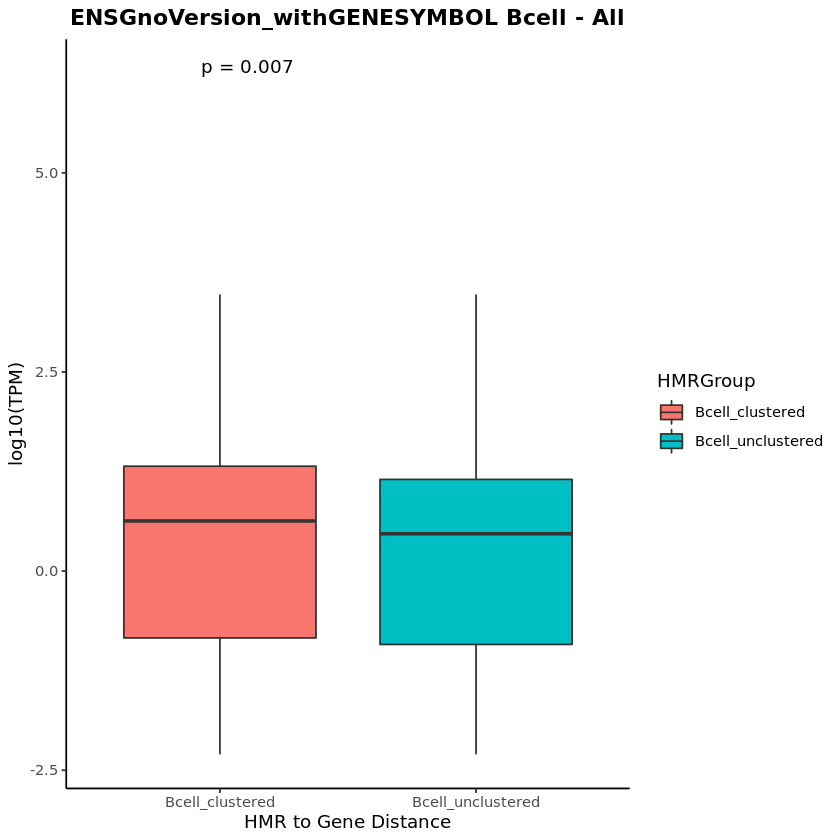

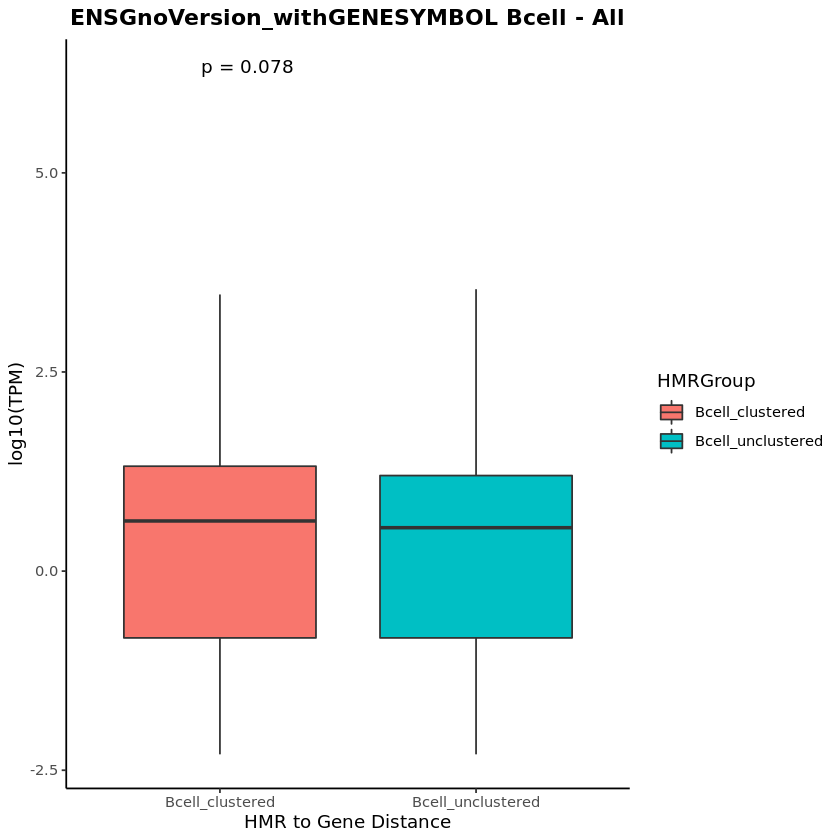

In [9]:
ggplot(Bcell_clustersContainsCS_Unclustered.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM.distBin, aes(x=HMRGroup, y=log10(TPM))) +
  geom_boxplot(aes(fill=HMRGroup)) +
  theme_classic() +
  ggtitle("ENSGnoVersion_withGENESYMBOL Bcell - All") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) +
  xlab("HMR to Gene Distance") +
  ylab("log10(TPM)") +
  stat_compare_means(aes(group=HMRGroup), 
                     method="wilcox.test",  
                     method.args = list(alternative = "two.sided"),
                     label="p",
                     label.y=6.25)

ggplot(Bcell_clustersContainsCS_UnclusteredLoose.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM.distBin, aes(x=HMRGroup, y=log10(TPM))) +
  geom_boxplot(aes(fill=HMRGroup)) +
  theme_classic() +
  ggtitle("ENSGnoVersion_withGENESYMBOL Bcell - All") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) +
  xlab("HMR to Gene Distance") +
  ylab("log10(TPM)") +
  stat_compare_means(aes(group=HMRGroup), 
                     method="wilcox.test",  
                     method.args = list(alternative = "two.sided"),
                     label="p",
                     label.y=6.25)

In [11]:
pdf("/data/hodges_lab/Tim/nnRNA.Clustered_vs_UnclusteredLoose.pdf")

ggplot(Bcell_clustersContainsCS_UnclusteredLoose.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM.distBin, aes(x=HMRGroup, y=log10(TPM))) +
  geom_boxplot(aes(fill=HMRGroup)) +
  theme_classic() +
  ggtitle("ENSGnoVersion_withGENESYMBOL Bcell - All") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) +
  xlab("HMR to Gene Distance") +
  ylab("log10(TPM)") +
  stat_compare_means(aes(group=HMRGroup), 
                     method="wilcox.test",  
                     method.args = list(alternative = "two.sided"),
                     label="p",
                     label.y=6.25)

dev.off()

png 
  2

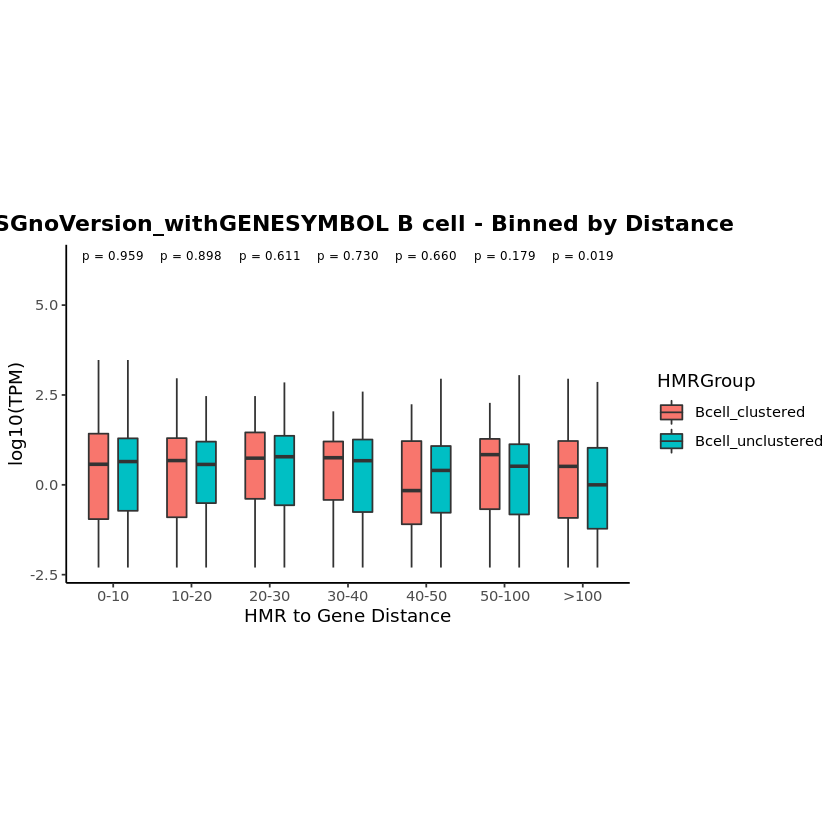

In [19]:
ggplot(Bcell_clustersContainsCS_Unclustered.2NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.uniqueENSGTSS_TPM.distBin, aes(x=distBin, y=log10(TPM))) +
  geom_boxplot(aes(fill=HMRGroup), width = .5, position=position_dodge(.75)) +
  theme_classic() +
  ggtitle("ENSGnoVersion_withGENESYMBOL B cell - Binned by Distance") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) +
  xlab("HMR to Gene Distance") +
  ylab("log10(TPM)") +
  stat_compare_means(aes(group=HMRGroup), 
                     method="wilcox.test",  
                     method.args = list(alternative = "two.sided"),
                     label="p",
                     label.y=6.25,
                    size = 2.5) +
  theme(aspect.ratio = .6)

# Plot fraction HMRs - 1 NN

## Find 100NN

In [4]:
HOME_DIR=/data/hodges_lab/Tim/nnRNA_TPM_EHGM/
mkdir -p ${HOME_DIR}
REF_DIR=${HOME_DIR}reference_files/

# Directory 
mkdir -p ${HOME_DIR}intermediate_files
cd ${HOME_DIR}intermediate_files

INTER_DIR=${HOME_DIR}intermediate_files/
REF_DIR=${HOME_DIR}reference_files/
OUT_DIR=${HOME_DIR}output_files/

echo "Done."

Done.


In [2]:
# Bcell 
bedtools sort -i ${REF_DIR}GM_ENSG_TPM_avg12_noVersion_hasHGNC_minTPM0.txt | awk 'BEGIN{OFS=FS="\t"}{print }' - > ${REF_DIR}GM_ENSG_TPM_avg12_noVersion_hasHGNC_minTPM0.sorted.txt

echo "Done."

Done.


## Continue - CL - UN - UN_LOOSE

In [6]:
WRK_DIR=/data/hodges_lab/Tim/ClusterTesting/

In [5]:
bedtools intersect -u -a ${WRK_DIR}Bcell_unclustered_hpl.RefSeqFilterFirst.txt -b /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_all_cellspecific_hpl.txt > ${WRK_DIR}Bcell_unclustered_loose_hpl.cellspecific.txt 

In [6]:
# Initalize HMR files 
CLUSTERED_CS_FILE=/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_internalClusters_individualHMRs_cellspecific_hpl.txt
UNCLUSTERED_CS_FILE=/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_unclustered_cellspecific_hpl.txt
UNCLUSTERED_LOOSE_CS_FILE=${WRK_DIR}Bcell_unclustered_loose_hpl.cellspecific.txt 

awk 'BEGIN{OFS=FS="\t"}{print $1,$2,$3,"Bcell_ClusteredCS"}' ${CLUSTERED_CS_FILE} | bedtools sort -i - > ${INTER_DIR}Bcell.clustered_cs.tmp_sorted.txt
awk 'BEGIN{OFS=FS="\t"}{print $1,$2,$3,"Bcell_UnclusteredCS"}' ${UNCLUSTERED_CS_FILE} | bedtools sort -i - > ${INTER_DIR}Bcell.unclustered_cs,.tmp_sorted.txt
awk 'BEGIN{OFS=FS="\t"}{print $1,$2,$3,"Bcell_UnclusteredCS"}' ${UNCLUSTERED_LOOSE_CS_FILE} | bedtools sort -i - > ${WRK_DIR}Bcell_unclustered_hpl.RefSeqFilterFirst.cellspecific.txt

echo "Done."

## How many clusters are represented by the individual clustered cell specific HMRs
bedtools intersect -u -a /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_internalClusters_hpl.txt -b /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_internalClusters_individualHMRs_cellspecific_hpl.txt > ${INTER_DIR}Bcell_internalClusters_hpl.containsCellSpecificHMR.txt

wc -l ${INTER_DIR}Bcell_internalClusters_hpl.containsCellSpecificHMR.txt

awk 'BEGIN{OFS=FS="\t"}{print $1,$2,$3,"Bcell_ClusteredCS"}' ${INTER_DIR}Bcell_internalClusters_hpl.containsCellSpecificHMR.txt | bedtools sort -i - > ${INTER_DIR}Bcell_internalClusters_hpl.containsCellSpecificHMR.tmp_sorted.txt

echo "Done."

Done.
484 /data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_internalClusters_hpl.containsCellSpecificHMR.txt
Done.


In [7]:
bedtools closest -d -k 100 -a ${INTER_DIR}Bcell_internalClusters_hpl.containsCellSpecificHMR.tmp_sorted.txt -b ${REF_DIR}GM_ENSG_TPM_avg12_noVersion_hasHGNC_minTPM0.sorted.txt > ${INTER_DIR}Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt

echo "Done."

Done.


In [8]:
bedtools closest -d -k 100 -a ${INTER_DIR}Bcell.unclustered_cs.tmp_sorted.txt -b ${REF_DIR}GM_ENSG_TPM_avg12_noVersion_hasHGNC_minTPM0.sorted.txt > ${INTER_DIR}Bcell_unclustered_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt

echo "Done."

Done.


In [8]:
bedtools closest -d -k 100 -a ${WRK_DIR}Bcell_unclustered_hpl.RefSeqFilterFirst.cellspecific.txt -b ${REF_DIR}GM_ENSG_TPM_avg12_noVersion_hasHGNC_minTPM0.sorted.txt > ${INTER_DIR}Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt

echo "Done."

Done.


## Find denominators

In [7]:
wc -l ${INTER_DIR}Bcell_internalClusters_hpl.containsCellSpecificHMR.tmp_sorted.txt
wc -l ${INTER_DIR}Bcell.unclustered_cs.tmp_sorted.txt
wc -l ${WRK_DIR}Bcell_unclustered_hpl.RefSeqFilterFirst.cellspecific.txt

484 /data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_internalClusters_hpl.containsCellSpecificHMR.tmp_sorted.txt
1844 /data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell.unclustered_cs.tmp_sorted.txt
2270 /data/hodges_lab/Tim/ClusterTesting/Bcell_unclustered_hpl.RefSeqFilterFirst.cellspecific.txt


In [18]:
awk 'BEGIN{OFS=FS="\t"}{if ($1=="chrY") print}' ${INTER_DIR}Bcell_internalClusters_hpl.containsCellSpecificHMR.tmp_sorted.txt | wc -l 

awk 'BEGIN{OFS=FS="\t"}{if ($1!="chrY") print}' ${INTER_DIR}Bcell_internalClusters_hpl.containsCellSpecificHMR.tmp_sorted.txt | wc -l 

40
444


In [19]:
awk 'BEGIN{OFS=FS="\t"}{if ($1=="chrY") print}' ${INTER_DIR}Bcell.unclustered_cs.tmp_sorted.txt | wc -l 

awk 'BEGIN{OFS=FS="\t"}{if ($1!="chrY") print}' ${INTER_DIR}Bcell.unclustered_cs.tmp_sorted.txt | wc -l 

223
1621


In [20]:
awk 'BEGIN{OFS=FS="\t"}{if ($1=="chrY") print}' ${WRK_DIR}Bcell_unclustered_hpl.RefSeqFilterFirst.cellspecific.txt | wc -l 

awk 'BEGIN{OFS=FS="\t"}{if ($1!="chrY") print}' ${WRK_DIR}Bcell_unclustered_hpl.RefSeqFilterFirst.cellspecific.txt | wc -l 

230
2040


## TAD Filter

In [9]:
# Intersect 2NN file with TADs

# First, create an HMR-Gene end-to-end BED file:
#"ChrHMRProm","StartHMRProm","EndHMRProm","ChrHMR","StartHMR","EndHMR","ChrProm","StartProm","EndProm","ENSEMBL","TPM","HMRPromDist","HMRGroup"

# Check if HMR is before the TSS, else, TSS before  
awk 'BEGIN{OFS=FS="\t"}{if ($2<$6)
print $1,$2,$7,$1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12;
else print $1,$6,$3,$1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12;
}' ${INTER_DIR}Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt | awk 'BEGIN{OFS=FS="\t"}{if ($2!~/-1/) print}' - > b

awk 'BEGIN{OFS=FS="\t"}{if ($2<$6)
print $1,$2,$7,$1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12;
else print $1,$6,$3,$1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12;
}' ${INTER_DIR}Bcell_unclustered_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt | awk 'BEGIN{OFS=FS="\t"}{if ($2!~/-1/) print}' - > ${INTER_DIR}Bcell_unclustered_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt

#################### NEED TO EDIT
awk 'BEGIN{OFS=FS="\t"}{if ($2<$6)
print $1,$2,$7,$1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12;
else print $1,$6,$3,$1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12;
}' ${INTER_DIR}Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.txt | awk 'BEGIN{OFS=FS="\t"}{if ($2!~/-1/) print}' - > ${INTER_DIR}Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt




echo "Made continuous BED file."


Made continuous BED file.


In [10]:
wc -l ${INTER_DIR}Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt 
wc -l ${INTER_DIR}Bcell_unclustered_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt
wc -l ${INTER_DIR}Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt

45165 /data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt
165145 /data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_unclustered_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt
207180 /data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt


In [11]:
bedtools intersect -f 1.0 -a ${INTER_DIR}Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt \
-b ${REF_DIR}GM12878_Lieberman-raw_TADs.txt > ${INTER_DIR}Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt

echo "Done."


bedtools intersect -f 1.0 -a ${INTER_DIR}Bcell_unclustered_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt  \
-b ${REF_DIR}GM12878_Lieberman-raw_TADs.txt > ${INTER_DIR}Bcell_unclustered_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt

echo "Done."


bedtools intersect -f 1.0 -a ${INTER_DIR}Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.ContinuousBEDFormat.txt  \
-b ${REF_DIR}GM12878_Lieberman-raw_TADs.txt > ${INTER_DIR}Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt

echo "Done."

Done.
Done.
Done.


## Filter down to 1NN per HMR

In [1]:
library(tidyverse)
library(ggplot2)
library(ggpubr)

#Set working directory 
setwd("/data/hodges_lab/Tim/nnRNA_TPM_EHGM/output_files/")

print("Loaded libraries.")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "Loaded libraries."


In [2]:
Bcell_clusters_containsCS <- read_tsv("/data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt", col_names = c("chr","start","end","numHMRs"))

Bcell_unclustered_CS <- 
read_tsv("/data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_unclustered_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt",  col_names = c("chr","start","end"))

Bcell_unclustered_loose_CS <- 
read_tsv("/data/hodges_lab/Tim/nnRNA_TPM_EHGM/intermediate_files/Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt",  col_names = c("chr","start","end"))

Rows: 4210 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): chr, numHMRs, X7, X8, X13, X14
dbl (9): start, end, X5, X6, X9, X10, X11, X12, X15

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 11105 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): chr, X4, X7, X8, X13, X14
dbl (9): start, end, X5, X6, X9, X10, X11, X12, X15

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 15496 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): chr, X4, X7, X8, X13, X14
dbl (9): start, end, X5, X6, X9, X10, X11, X12, X15

ℹ Use `spec()` to retrieve the full column specification for 

In [4]:
Bcell_clusters_containsCS %>% filter(chr!="chrY") %>% nrow()

[1] 4210

In [4]:
Bcell_unclustered_CS %>% filter(chr!="chrY") %>% nrow()

[1] 11105

In [3]:
Bcell_unclustered_loose_CS %>% filter(chr!="chrY") %>% nrow()

[1] 15496

In [3]:
Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered <- read_tsv("../intermediate_files/Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt", col_names=F) %>% magrittr::set_colnames(c("ChrHMRTSS","StartHMRTSS","EndHMRTSS","ChrHMR","StartHMR","EndHMR","HMRGroup","ChrTSS","StartTSS","EndTSS","TPM","strand","GENE_SYMBOL","ENSEMBL","HMRTSSDist")) 


Bcell_unclustered_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered <- read_tsv("../intermediate_files/Bcell_unclustered_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt", col_names=F) %>% magrittr::set_colnames(c("ChrHMRTSS","StartHMRTSS","EndHMRTSS","ChrHMR","StartHMR","EndHMR","HMRGroup","ChrTSS","StartTSS","EndTSS","TPM","strand","GENE_SYMBOL","ENSEMBL","HMRTSSDist"))

Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered <- read_tsv("../intermediate_files/Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.txt", col_names=F) %>% magrittr::set_colnames(c("ChrHMRTSS","StartHMRTSS","EndHMRTSS","ChrHMR","StartHMR","EndHMR","HMRGroup","ChrTSS","StartTSS","EndTSS","TPM","strand","GENE_SYMBOL","ENSEMBL","HMRTSSDist"))

Rows: 4210 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X4, X7, X8, X13, X14
dbl (9): X2, X3, X5, X6, X9, X10, X11, X12, X15

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 11105 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X4, X7, X8, X13, X14
dbl (9): X2, X3, X5, X6, X9, X10, X11, X12, X15

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 15496 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X4, X7, X8, X13, X14
dbl (9): X2, X3, X5, X6, X9, X10, X11, X12, X15

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify

In [ ]:
#### Proportion of Clusters(w/ CS) (out of 444 - no chrY) - TAD FILTER

In [4]:
Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered %>% 
group_by(ChrHMR, StartHMR) %>% # Group by each HMR
top_n(n = 1, wt = -HMRTSSDist) %>%  # Take top row by lowest Distance
top_n(n = 1, wt = TPM) %>%  # Might overlap two genes or have a tie in dist. Take top TPM
top_n(n = 1, wt = GENE_SYMBOL) %>%  # Might still overlap two genes with same TPM (often 0TPM), so take first alphabetically
nrow()

[1] 424

In [ ]:
#### Proportion of Clusters(w/ CS) (out of 444 - no chrY) -  TAD FILTER

In [5]:
Bcell_unclustered_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered %>%
group_by(ChrHMR, StartHMR) %>% # Group by each HMR
top_n(n = 1, wt = -HMRTSSDist) %>%  # Take top row by lowest Distance
top_n(n = 1, wt = TPM) %>%  # Might overlap two genes or have a tie in dist. Take top TPM
top_n(n = 1, wt = GENE_SYMBOL) %>%  # Might still overlap two genes with same TPM (often 0TPM), so take first alphabetically
nrow()

[1] 1480

In [6]:
Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered %>%
group_by(ChrHMR, StartHMR) %>% # Group by each HMR
top_n(n = 1, wt = -HMRTSSDist) %>%  # Take top row by lowest Distance
top_n(n = 1, wt = TPM) %>%  # Might overlap two genes or have a tie in dist. Take top TPM
top_n(n = 1, wt = GENE_SYMBOL) %>%  # Might still overlap two genes with same TPM (often 0TPM), so take first alphabetically
nrow()

[1] 1870

In [10]:
Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered %>% nrow()

[1] 4210

In [11]:
Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered %>% group_by(ChrHMR, StartHMR) %>% top_n(n = 1, wt = -HMRTSSDist) %>% nrow()

[1] 426

In [12]:
Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered %>% group_by(ChrHMR, StartHMR) %>% top_n(n = 1, wt = -HMRTSSDist) %>% top_n(n = 1, wt = TPM) %>% top_n(n = 1, wt = GENE_SYMBOL) %>% nrow()

[1] 424

In [13]:
Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered %>% group_by(ChrHMR, StartHMR) %>% top_n(n = 1, wt = -HMRTSSDist) %>% top_n(n = 1, wt = TPM) %>% top_n(n = 1, wt = GENE_SYMBOL) %>% nrow()

[1] 424

In [9]:
Bcell_clusters_containsCS %>% filter(chr!="chrY") %>% nrow()
Bcell_clusters_containsCS_noY <- Bcell_clusters_containsCS %>% filter(chr!="chrY")
Bcell_clusters_containsCS_noY %>% nrow()

[1] 444

[1] 444

### Filter down 

In [17]:
Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.1NN

ChrHMRTSS,StartHMRTSS,EndHMRTSS,ChrHMR,StartHMR,EndHMR,HMRGroup,ChrTSS,StartTSS,EndTSS,TPM,strand,GENE_SYMBOL,ENSEMBL,HMRTSSDist
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
chr1,1385069,1394334,chr1,1394021,1394334,Bcell_UnclusteredCS,chr1,1385069,1385070,0.525,1,ATAD3C,ENSG00000215915,8952
chr1,1981909,2032210,chr1,2032031,2032210,Bcell_UnclusteredCS,chr1,1981909,1981910,0.575,1,PRKCZ,ENSG00000067606,50122
chr1,2263385,2323147,chr1,2263385,2263443,Bcell_UnclusteredCS,chr1,2323146,2323147,2.535,-1,MORN1,ENSG00000116151,59704
chr1,3569325,3573852,chr1,3573086,3573852,Bcell_UnclusteredCS,chr1,3569325,3569326,15.720,-1,WRAP73,ENSG00000116213,3761
chr1,6052533,6073327,chr1,6073217,6073327,Bcell_UnclusteredCS,chr1,6052533,6052534,3.605,-1,NPHP4,ENSG00000131697,20684
chr1,6659636,6673746,chr1,6659636,6660325,Bcell_UnclusteredCS,chr1,6673745,6673746,5.935,1,PHF13,ENSG00000116273,13421
chr1,12079523,12101107,chr1,12100074,12101107,Bcell_UnclusteredCS,chr1,12079523,12079524,21.715,1,MIIP,ENSG00000116691,20551
chr1,12227060,12258322,chr1,12258053,12258322,Bcell_UnclusteredCS,chr1,12227060,12227061,31.810,1,TNFRSF1B,ENSG00000028137,30993
chr1,14925200,15040438,chr1,15040254,15040438,Bcell_UnclusteredCS,chr1,14925200,14925201,1.670,1,KAZN,ENSG00000189337,115054


In [11]:
Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.1NN <-Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered %>% 
group_by(ChrHMR, StartHMR) %>% # Group by each HMR
top_n(n = 1, wt = -HMRTSSDist) %>%  # Take top row by lowest Distance
top_n(n = 1, wt = TPM) %>%  # Might overlap two genes or have a tie in dist. Take top TPM
top_n(n = 1, wt = GENE_SYMBOL)  # Might still overlap two genes with same TPM (often 0TPM), so take first alphabetically
print("Done.")

Bcell_unclustered_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.1NN <-Bcell_unclustered_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered %>%
group_by(ChrHMR, StartHMR) %>% # Group by each HMR
top_n(n = 1, wt = -HMRTSSDist) %>%  # Take top row by lowest Distance
top_n(n = 1, wt = TPM) %>%  # Might overlap two genes or have a tie in dist. Take top TPM
top_n(n = 1, wt = GENE_SYMBOL)  # Might still overlap two genes with same TPM (often 0TPM), so take first alphabetically
print("Done.")

Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.1NN <-Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered %>%
group_by(ChrHMR, StartHMR) %>% # Group by each HMR
top_n(n = 1, wt = -HMRTSSDist) %>%  # Take top row by lowest Distance
top_n(n = 1, wt = TPM) %>%  # Might overlap two genes or have a tie in dist. Take top TPM
top_n(n = 1, wt = GENE_SYMBOL)  # Might still overlap two genes with same TPM (often 0TPM), so take first alphabetically
print("Done.")

[1] "Done."
[1] "Done."
[1] "Done."


## Calculate fractions

In [12]:
Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.1NN

ChrHMRTSS,StartHMRTSS,EndHMRTSS,ChrHMR,StartHMR,EndHMR,HMRGroup,ChrTSS,StartTSS,EndTSS,TPM,strand,GENE_SYMBOL,ENSEMBL,HMRTSSDist
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
chr1,1385069,1394334,chr1,1394021,1394334,Bcell_UnclusteredCS,chr1,1385069,1385070,0.525,1,ATAD3C,ENSG00000215915,8952
chr1,1981909,2032210,chr1,2032031,2032210,Bcell_UnclusteredCS,chr1,1981909,1981910,0.575,1,PRKCZ,ENSG00000067606,50122
chr1,2263385,2323147,chr1,2263385,2263443,Bcell_UnclusteredCS,chr1,2323146,2323147,2.535,-1,MORN1,ENSG00000116151,59704
chr1,3569325,3573852,chr1,3573086,3573852,Bcell_UnclusteredCS,chr1,3569325,3569326,15.720,-1,WRAP73,ENSG00000116213,3761
chr1,6052533,6073327,chr1,6073217,6073327,Bcell_UnclusteredCS,chr1,6052533,6052534,3.605,-1,NPHP4,ENSG00000131697,20684
chr1,6659636,6673746,chr1,6659636,6660325,Bcell_UnclusteredCS,chr1,6673745,6673746,5.935,1,PHF13,ENSG00000116273,13421
chr1,12079523,12101107,chr1,12100074,12101107,Bcell_UnclusteredCS,chr1,12079523,12079524,21.715,1,MIIP,ENSG00000116691,20551
chr1,12227060,12258322,chr1,12258053,12258322,Bcell_UnclusteredCS,chr1,12227060,12227061,31.810,1,TNFRSF1B,ENSG00000028137,30993
chr1,14925200,15040438,chr1,15040254,15040438,Bcell_UnclusteredCS,chr1,14925200,14925201,1.670,1,KAZN,ENSG00000189337,115054


In [15]:
numGene_UNlooseCS_1NN

thresholds,HMRGroup
<dbl>,<chr>
10000,Bcell_unclustered_loose
25000,Bcell_unclustered_loose
50000,Bcell_unclustered_loose
75000,Bcell_unclustered_loose
100000,Bcell_unclustered_loose
150000,Bcell_unclustered_loose


In [14]:
threshold_list <- c(10000,25000,50000,75000,100000,150000)

numGene_CLcontainsCS_1NN <- tibble(
    thresholds = threshold_list,
    HMRGroup = "Bcell_clustersContainsCS"
)

numGene_UNCS_1NN <- tibble(
    thresholds = threshold_list,
    HMRGroup = "Bcell_unclustered"
)

numGene_UNlooseCS_1NN <- tibble(
    thresholds = threshold_list,
    HMRGroup = "Bcell_unclustered_loose"
)



get_numGenes_per_threshold <- function(thresh, df){
    df %>% dplyr::filter(HMRTSSDist < thresh) %>% nrow()
}
                                                    
print("Initialized.")

[1] "Initialized."


In [16]:
# Get numbers by threshold

# CLusters that contain Cell Specific 
CLcontainsCS_counts <- map(threshold_list, get_numGenes_per_threshold, df = Bcell_clusters_containsCS.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.1NN)

numGene_CLcontainsCS_1NN$HMRCounts <- unlist(CLcontainsCS_counts)

print("Done.")




# UNclustered Cell specific 
UNCS_counts <- map(threshold_list, get_numGenes_per_threshold, df = Bcell_unclustered_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.1NN)

numGene_UNCS_1NN$HMRCounts <- unlist(UNCS_counts)

print("Done.")



# UNclustered - All -  Cell specific 
UNCS_loose_counts <- map(threshold_list, get_numGenes_per_threshold, df = Bcell_unclustered_loose_cellspecific.100NN.GM_ENSGnoVersionGENESYMBOL_minTPM0.TAD_filtered.1NN)

numGene_UNlooseCS_1NN$HMRCounts <- unlist(UNCS_loose_counts)




print("Done.")

[1] "Done."
[1] "Done."
[1] "Done."


In [17]:
numGene_CLcontainsCS_1NN
numGene_UNCS_1NN
numGene_UNlooseCS_1NN

thresholds,HMRGroup,HMRCounts
<dbl>,<chr>,<int>
10000,Bcell_clustersContainsCS,138
25000,Bcell_clustersContainsCS,219
50000,Bcell_clustersContainsCS,290
75000,Bcell_clustersContainsCS,324
100000,Bcell_clustersContainsCS,351
150000,Bcell_clustersContainsCS,378


thresholds,HMRGroup,HMRCounts
<dbl>,<chr>,<int>
10000,Bcell_unclustered,122
25000,Bcell_unclustered,403
50000,Bcell_unclustered,737
75000,Bcell_unclustered,906
100000,Bcell_unclustered,1013
150000,Bcell_unclustered,1143


thresholds,HMRGroup,HMRCounts
<dbl>,<chr>,<int>
10000,Bcell_unclustered_loose,389
25000,Bcell_unclustered_loose,712
50000,Bcell_unclustered_loose,1083
75000,Bcell_unclustered_loose,1267
100000,Bcell_unclustered_loose,1378
150000,Bcell_unclustered_loose,1518


In [20]:
# Calc fraction
numGene_CLcontainsCS_1NN_fraction <- numGene_CLcontainsCS_1NN %>% mutate(fraction = (HMRCounts/444) )
numGene_UNCS_1NN_fraction <- numGene_UNCS_1NN %>% mutate(fraction = (HMRCounts/1621) )
numGene_UNlooseCS_1NN_fraction <- numGene_UNlooseCS_1NN %>% mutate(fraction = (HMRCounts/2040) )

numGene_CLcontainsCS_UNCS_1NN_fraction <- rbind(numGene_CLcontainsCS_1NN_fraction, numGene_UNCS_1NN_fraction )

numGene_CLcontainsCS_UNCS_UNCSloose_1NN_fraction <- rbind(numGene_CLcontainsCS_1NN_fraction, numGene_UNCS_1NN_fraction, numGene_UNlooseCS_1NN_fraction)

print("Done.")

[1] "Done."


## Plot

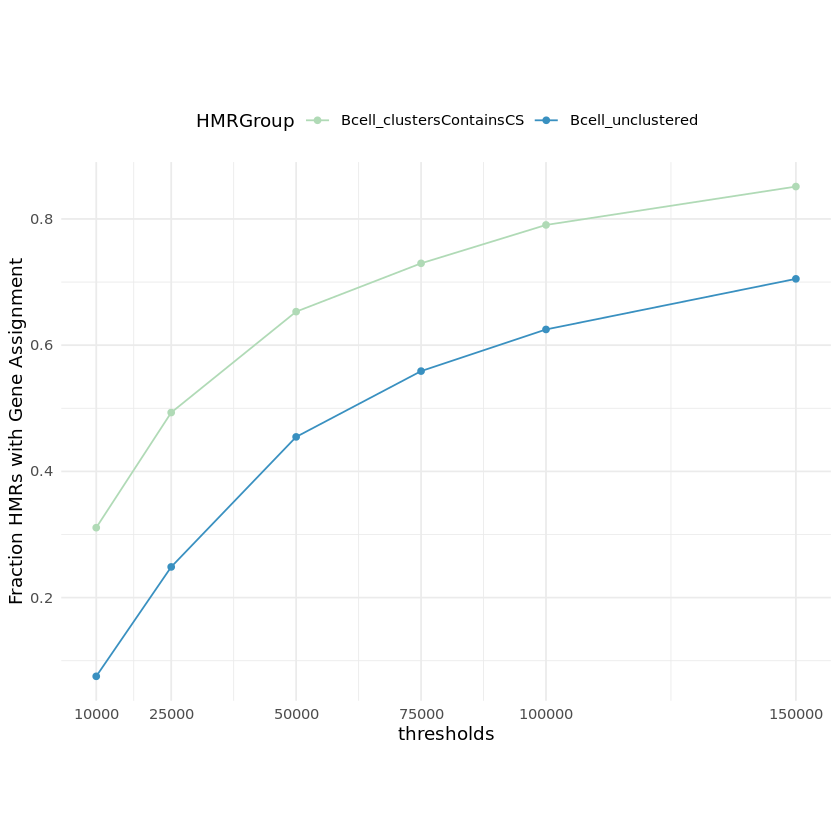

In [19]:
p_numGene_1NN <- numGene_CLcontainsCS_UNCS_1NN_fraction %>%
ggplot(aes(x = thresholds, y = fraction)) +
geom_point(aes(color = HMRGroup)) + 
geom_line(aes(color = HMRGroup)) +
theme_minimal() +
scale_color_manual(values=c("#B0DAB6", "#3990C0")) +
theme(aspect.ratio = .7, legend.position = "top") +
scale_x_continuous(breaks=threshold_list) +
ylab("Fraction HMRs with Gene Assignment")
p_numGene_1NN

png 
  2

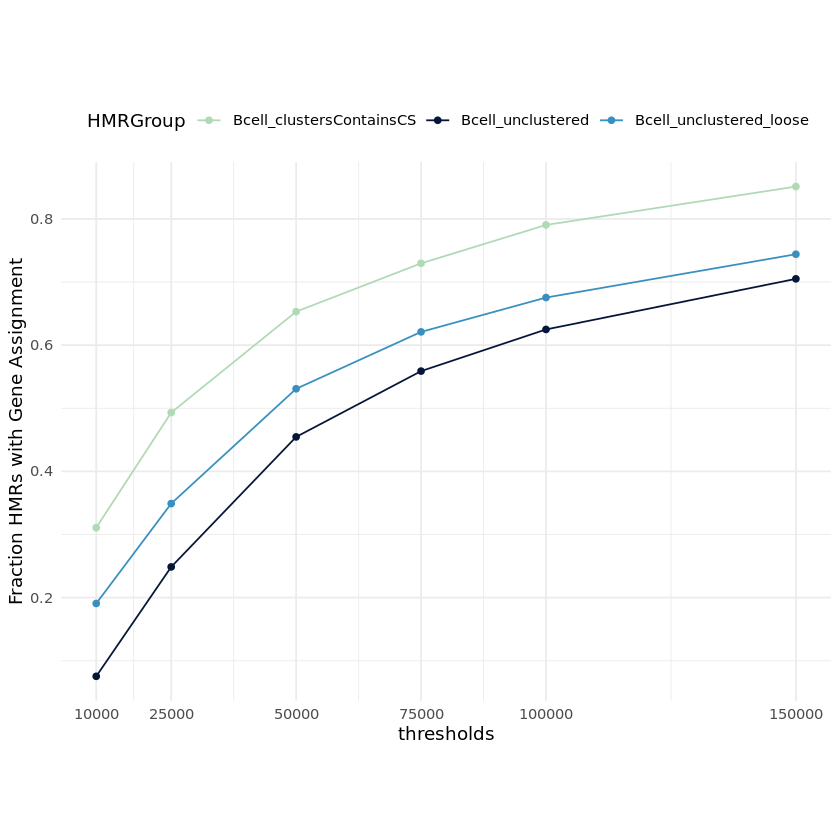

In [25]:
pdf("/data/hodges_lab/Tim/FractionGenesByDistance_Cl_Un_UnLoose.pdf")

p <- numGene_CLcontainsCS_UNCS_UNCSloose_1NN_fraction %>%
ggplot(aes(x = thresholds, y = fraction)) +
geom_point(aes(color = HMRGroup)) + 
geom_line(aes(color = HMRGroup)) +
theme_minimal() +
scale_color_manual(values=c("#B0DAB6", "#061638", "#3990C0")) +
theme(aspect.ratio = .7, legend.position = "top") +
scale_x_continuous(breaks=threshold_list) +
ylab("Fraction HMRs with Gene Assignment")
p

dev.off()
p

In [ ]:
## Fraction of fractions

In [26]:
numGene_CLcontainsCS_UNCS_1NN_fractionRatio <- merge(numGene_CLcontainsCS_1NN_fraction, numGene_UNCS_1NN_fraction, by = "thresholds") %>% mutate(fractionRatio = (fraction.x/fraction.y))

numGene_CLcontainsCS_UNCSLoose_1NN_fractionRatio <- merge(numGene_CLcontainsCS_1NN_fraction, numGene_UNlooseCS_1NN_fraction, by = "thresholds") %>% mutate(fractionRatio = (fraction.x/fraction.y))

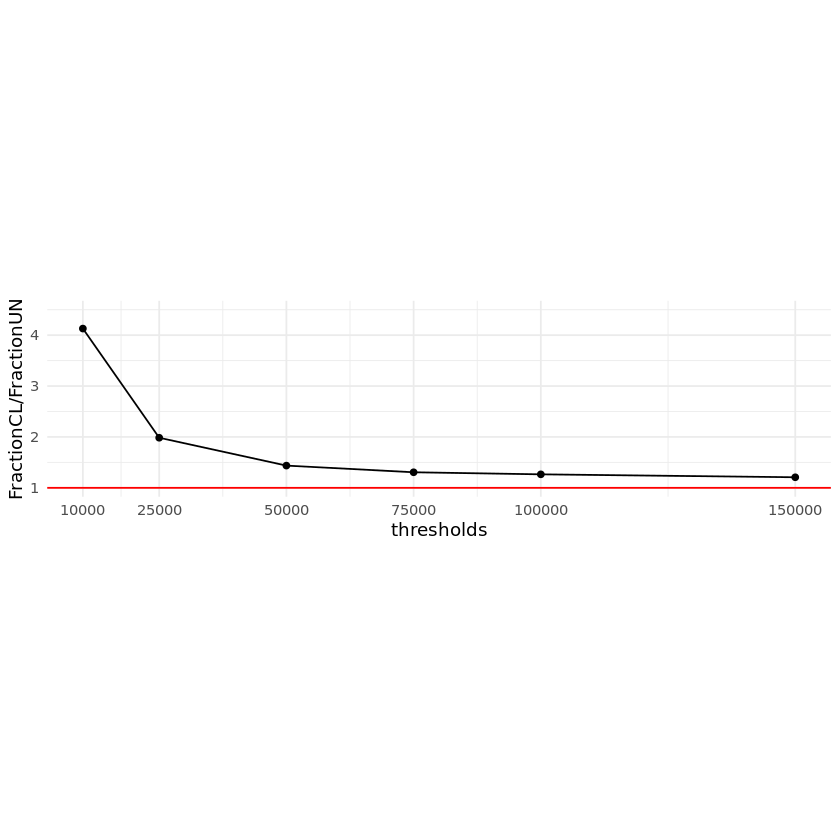

In [22]:
p_numGeneFraction_1NN <- numGene_CLcontainsCS_UNCS_1NN_fractionRatio %>% 
ggplot(aes(x = thresholds, y = fractionRatio)) +
geom_point() + 
geom_line() +
geom_hline(yintercept = 1, color = "red") + 
coord_cartesian(ylim = c(1,4.5)) +
theme_minimal() +
scale_x_continuous(breaks=threshold_list) + 
theme(aspect.ratio = .25) +
ylab("FractionCL/FractionUN")

p_numGeneFraction_1NN

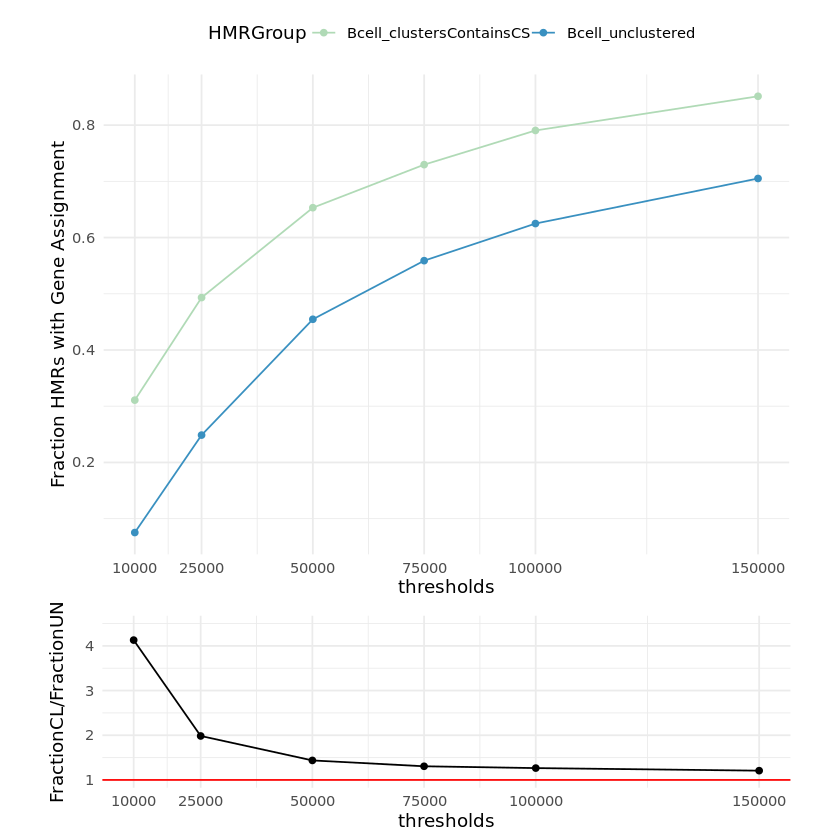

In [23]:
ggpubr::ggarrange(p_numGene_1NN, p_numGeneFraction_1NN, nrow = 2, align = "v", heights = c(4, 1.539))

## Stats for fractions

In [24]:
head(numGene_CLcontainsCS_UNCS_1NN_fractionRatio, 3)

,thresholds,HMRGroup.x,HMRCounts.x,fraction.x,HMRGroup.y,HMRCounts.y,fraction.y,fractionRatio
,<dbl>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,10000,Bcell_clustersContainsCS,138,0.3108108,Bcell_unclustered,122,0.07526218,4.129708
2,25000,Bcell_clustersContainsCS,219,0.4932432,Bcell_unclustered,403,0.24861197,1.983988
3,50000,Bcell_clustersContainsCS,290,0.6531532,Bcell_unclustered,737,0.45465762,1.436582


In [29]:
# Cl vs. Un
numGene_CLcontainsCS_UNCS_1NN_fractionRatio_pvals <- numGene_CLcontainsCS_UNCS_1NN_fractionRatio %>% rowwise() %>% mutate(
    propTestP = prop.test(x = c(HMRCounts.x, HMRCounts.y), n = c(444, 1621))$p.value,
    propTestStat = prop.test(x = c(HMRCounts.x, HMRCounts.y), n = c(444, 1621))$statistic,
)
numGene_CLcontainsCS_UNCS_1NN_fractionRatio_pvals


# Cl vs. UnLoose
numGene_CLcontainsCS_UNCSLoose_1NN_fractionRatio_pvals <- numGene_CLcontainsCS_UNCSLoose_1NN_fractionRatio %>% rowwise() %>% mutate(
    propTestP = prop.test(x = c(HMRCounts.x, HMRCounts.y), n = c(444, 2040))$p.value,
    propTestStat = prop.test(x = c(HMRCounts.x, HMRCounts.y), n = c(444, 2040))$statistic,
)
numGene_CLcontainsCS_UNCSLoose_1NN_fractionRatio_pvals

thresholds,HMRGroup.x,HMRCounts.x,fraction.x,HMRGroup.y,HMRCounts.y,fraction.y,fractionRatio,propTestP,propTestStat
<dbl>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
10000,Bcell_clustersContainsCS,138,0.3108108,Bcell_unclustered,122,0.07526218,4.129708,1.224932e-39,173.57631
25000,Bcell_clustersContainsCS,219,0.4932432,Bcell_unclustered,403,0.24861197,1.983988,4.320121e-23,97.93652
50000,Bcell_clustersContainsCS,290,0.6531532,Bcell_unclustered,737,0.45465762,1.436582,1.866878e-13,54.14015
75000,Bcell_clustersContainsCS,324,0.7297297,Bcell_unclustered,906,0.55891425,1.305620,1.168654e-10,41.51675
100000,Bcell_clustersContainsCS,351,0.7905405,Bcell_unclustered,1013,0.62492289,1.265021,9.607968e-11,41.89965
150000,Bcell_clustersContainsCS,378,0.8513514,Bcell_unclustered,1143,0.70512030,1.207385,8.423779e-10,37.65945


thresholds,HMRGroup.x,HMRCounts.x,fraction.x,HMRGroup.y,HMRCounts.y,fraction.y,fractionRatio,propTestP,propTestStat
<dbl>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
10000,Bcell_clustersContainsCS,138,0.3108108,Bcell_unclustered_loose,389,0.1906863,1.629959,2.912668e-08,30.76485
25000,Bcell_clustersContainsCS,219,0.4932432,Bcell_unclustered_loose,712,0.3490196,1.413225,1.748548e-08,31.75548
50000,Bcell_clustersContainsCS,290,0.6531532,Bcell_unclustered_loose,1083,0.5308824,1.230316,3.430992e-06,21.55905
75000,Bcell_clustersContainsCS,324,0.7297297,Bcell_unclustered_loose,1267,0.6210784,1.174940,1.962262e-05,18.22557
100000,Bcell_clustersContainsCS,351,0.7905405,Bcell_unclustered_loose,1378,0.6754902,1.170321,2.364742e-06,22.27328
150000,Bcell_clustersContainsCS,378,0.8513514,Bcell_unclustered_loose,1518,0.7441176,1.144109,1.977369e-06,22.61691


png 
  2

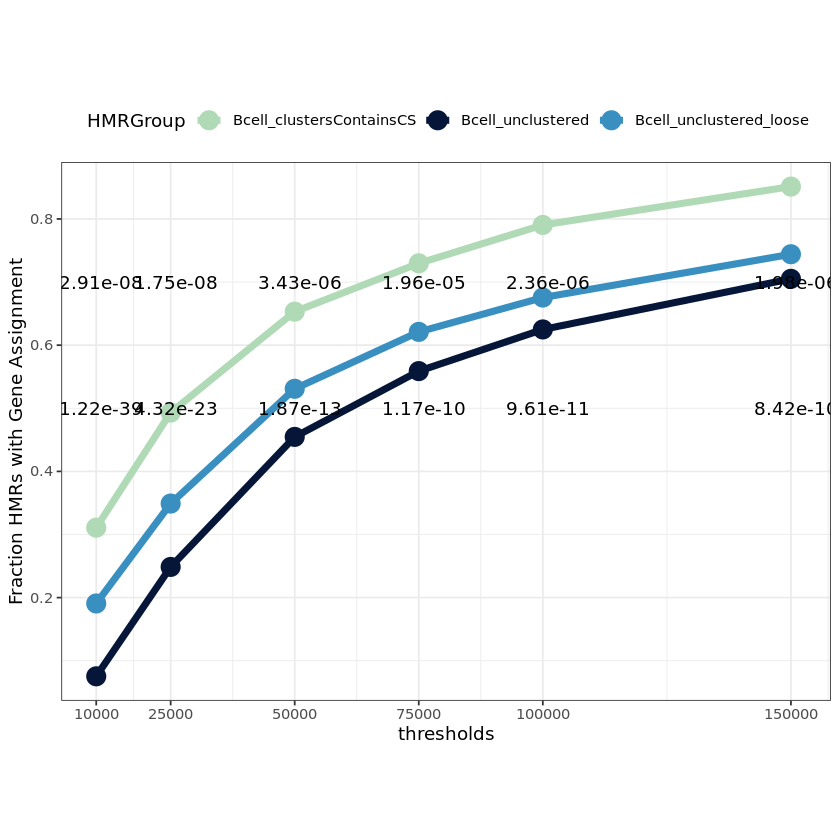

In [39]:
pdf("/data/hodges_lab/Tim/Bcell.TAD.1NN.UniqueGenes.ProportionOfHMRsbyDistance.July15.Cl_Un_UnLoose.pdf")

ps <- numGene_CLcontainsCS_UNCS_UNCSloose_1NN_fraction %>%
ggplot(aes(x = thresholds, y = fraction)) +
geom_point(aes(color = HMRGroup), size = 5) + 
geom_line(aes(color = HMRGroup), size = 2) +
theme_bw() +
scale_color_manual(values=c("#B0DAB6", "#061638", "#3990C0")) +
theme(aspect.ratio = .7, legend.position = "top") +
scale_x_continuous(breaks=threshold_list) +
ylab("Fraction HMRs with Gene Assignment") +
geom_text(data = numGene_CLcontainsCS_UNCS_1NN_fractionRatio_pvals, aes(x = thresholds+1000, y = .5, label = format(propTestP, digits=3))) +
geom_text(data = numGene_CLcontainsCS_UNCSLoose_1NN_fractionRatio_pvals, aes(x = thresholds+1000, y = .7, label = format(propTestP, digits=3)))
ps

dev.off()
ps

png 
  2

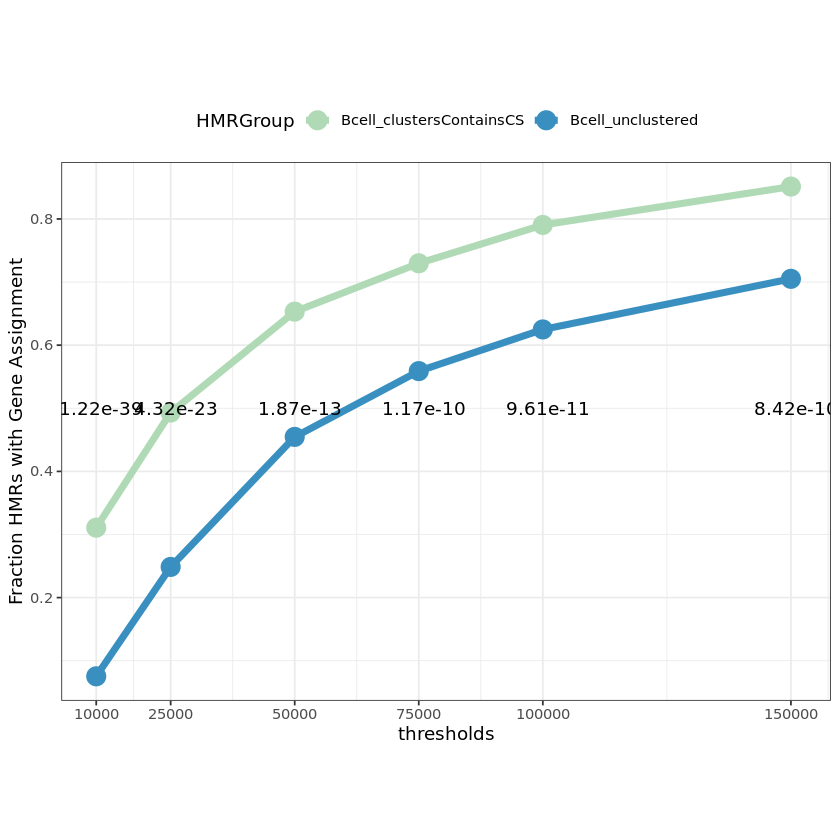

In [30]:
pdf("Bcell.TAD.1NN.UniqueGenes.ProportionOfHMRsbyDistance.June11.pdf")

p_numGene_1NN_stats <- numGene_CLcontainsCS_UNCS_1NN_fraction %>%
ggplot(aes(x = thresholds, y = fraction)) +
geom_point(aes(color = HMRGroup), size = 5) + 
geom_line(aes(color = HMRGroup), size = 2) +
theme_bw() +
scale_color_manual(values=c("#B0DAB6", "#3990C0")) +
theme(aspect.ratio = .7, legend.position = "top") +
scale_x_continuous(breaks=threshold_list) +
ylab("Fraction HMRs with Gene Assignment") +
geom_text(data = numGene_CLcontainsCS_UNCS_1NN_fractionRatio_pvals, aes(x = thresholds+1000, y = .5, label = format(propTestP, digits=3)))
p_numGene_1NN_stats

dev.off()
p_numGene_1NN_stats